# 6CS012 Workshop 10:  IMDB TEXT CLASSIFICATION

Hints:
- USE deep neural network(Keras library) to classify postive & negative review.
- First use one hot encoding for encoding. 
One hot encoding technique is ............ 
- During model training, use 100% (i.e. 25000 reviews) of the given training dataset.
- Secondly, create the another model with exact same architecture but use only 20% (i.e. 5000 reviews)
    of the given dataset for training
- Finally, use a pretrained embedded information for classification. Pretrained emmbeded
model is the file called preTrained_we.txt.

Note : For experimental purpose, You can alter & tweak the hyperparameters. But don't forget explain your result.

In [2]:
#Import required libraries

import os
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Assuming that there are maximum 10000 unique words across
# the reviews in the datasets
vocab_size = 10000

#specifies maximum number of words to read from a review
max_length = 100

In [4]:
#Reading training data into memory along with the labels.
imdb_dir='aclImdb'

#setting training dataset directory path
train_dir=os.path.join(imdb_dir,'train')
labels_train=[]
texts_train=[]
for train_label_type in ['neg','pos']:
    dir_name=os.path.join(train_dir,train_label_type)
    for fname in os.listdir(dir_name):
        f =open(os.path.join(dir_name,fname), encoding='utf8')
        texts_train.append(f.read())
        f.close()
        if train_label_type=='neg':
            
            labels_train.append(0)
        else:
            labels_train.append(1)
print('Training data count :', len(texts_train))

Training data count : 25000


In [5]:
labels_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [6]:
#Similary as above read the test data....(into memory along with the labels)
#Reading training data into memory along with the labels.
imdb_dir='aclImdb'

#setting training dataset directory path
test_dir=os.path.join(imdb_dir,'test')
labels_test=[]
texts_test=[]
for test_label_type in ['neg','pos']:
    dir_name=os.path.join(test_dir,test_label_type)
    for fname in os.listdir(dir_name):
        f =open(os.path.join(dir_name,fname), encoding='utf8')
        texts_test.append(f.read())
        f.close()
        if test_label_type=='neg':
             labels_test.append(0)
        else:
            labels_test.append(1)
print('Testing data count :', len(texts_test))

Testing data count : 25000


In [7]:
# NN model 
def createModel():
    #instantiating Keras sequential model
    model = Sequential()
    
    #defining embedding layer to represent padded vector sequence
    #in densed structure and generate word embeddings
    #input_length must be equal to the dimension of
    #padded vector sequence which will be 100 in this case
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    
    #convering 100*100 size array into 1 dimensional array
    model.add(Flatten())
    
    #defining hidden layer as fully connected layer
    #those 10000 input nodes will be fully connected to
    #64 perceptrons and each neuron will have 'relu'
    #as an activation function.
    model.add(Dense(64,activation='relu'))
    
    #final output layer receiving 64 intermediate output
    #from preceding Dense layer and generating
    #output between 0 to 1 using sigmoid activation function.
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [8]:
# compile the model using different hyper-parameters
#instantiating a model
model1=createModel()
model1.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['acc'])
# summarize the model
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________
None


PART I: CLASSIFICATION USING HOT ENCODING ALGORITHM (Using complete dataset)

In [9]:
#Create embedded information for training dataset using one hot encoding.
# using one hot encoder for encoding words in training pharases
encoded_training_documents = [one_hot(sentence, vocab_size)
                              for sentence in texts_train]

In [10]:
# Similary as above, create embedded information for testing dataset using one hot encoding..
encoded_testing_documents = [one_hot(sentence, vocab_size)
                              for sentence in texts_test]

In [11]:
#Generate padded sequence from encoded training dataset using post padding
#pad training documents to a max length of 100 
padded_training_documents = pad_sequences(
                                encoded_training_documents,
                                maxlen=max_length,
                                padding='post')

In [12]:
# Similary as above, pad testing documents to a max length of 100
padded_testing_documents = pad_sequences(
                                encoded_testing_documents,
                                maxlen=max_length,
                                padding='post')

In [13]:
#Fit the model
model1.fit(padded_training_documents, labels_train, epochs=10, verbose=1)
#You can check & test other hyperparameters as well

C:\Users\Puzn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.4466 - acc: 0.7798
Epoch 2/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.1527 - acc: 0.9426
Epoch 3/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0186 - acc: 0.9943
Epoch 4/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0012 - acc: 0.9996
Epoch 5/10
25000/25000 [==============================] - 27s 1ms/step - loss: 6.9670e-05 - acc: 1.0000
Epoch 6/10
25000/25000 [==============================] - 28s 1ms/step - loss: 5.0054e-07 - acc: 1.0000
Epoch 7/10
25000/25000 [==============================] - 29s 1ms/step - loss: 4.7865e-09 - acc: 1.0000
Epoch 8/10
25000/25000 [==============================] - 28s 1ms/step - loss: 1.9017e-09 - acc: 1.0000
Epoch 9/10
25000/25000 [==============================] - 28s 1ms/step - loss: 9.4755e-10 - acc: 1.0000
Epoch 10/10
25000/25000 [==============================] - 29s 1ms/step - loss: 

In [14]:
#Evaluate the model
loss1, accuracy1 = model1.evaluate(padded_testing_documents, labels_test, verbose=1)

25000/25000 [==============================] - 2s 82us/step


In [15]:
#Accuracy
print('Accuracy: %f' % (accuracy1*100),'Loss :',loss1)

Accuracy: 79.799998 Loss : 1.8217436814278365


(Using 20% dataset of the given dataset) Repeat all steps and explain everything. Which one is better and why?

Conclusion Part 1:Task-specific word embedding
– Model (layers) :  Our model is a sequential model

– Your choice of loss function and activation function(Which and why?)
– Compare model (100% vs 20% input data size while training)
               

In [16]:
# compile the model using different hyper-parameters
#instantiating a model
model2=createModel()
model2.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['acc'])
# summarize the model
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________
None


In [18]:

#Fit the model
model2.fit(padded_training_documents, labels_train, epochs=10, validation_split=0.2, verbose=1)

C:\Users\Puzn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
15456/20000 [======================>.......] - ETA: 8:02 - loss: 0.2492 - acc: 0.531 - ETA: 2:52 - loss: 0.2509 - acc: 0.447 - ETA: 1:50 - loss: 0.2506 - acc: 0.475 - ETA: 1:23 - loss: 0.2507 - acc: 0.459 - ETA: 1:08 - loss: 0.2506 - acc: 0.454 - ETA: 58s - loss: 0.2506 - acc: 0.463 - ETA: 51s - loss: 0.2503 - acc: 0.47 - ETA: 46s - loss: 0.2502 - acc: 0.47 - ETA: 43s - loss: 0.2503 - acc: 0.48 - ETA: 38s - loss: 0.2501 - acc: 0.49 - ETA: 35s - loss: 0.2501 - acc: 0.49 - ETA: 32s - loss: 0.2500 - acc: 0.50 - ETA: 30s - loss: 0.2499 - acc: 0.50 - ETA: 28s - loss: 0.2497 - acc: 0.51 - ETA: 27s - loss: 0.2497 - acc: 0.51 - ETA: 26s - loss: 0.2496 - acc: 0.52 - ETA: 25s - loss: 0.2496 - acc: 0.52 - ETA: 25s - loss: 0.2495 - acc: 0.52 - ETA: 24s - loss: 0.2493 - acc: 0.53 - ETA: 23s - loss: 0.2492 - acc: 0.53 - ETA: 23s - loss: 0.2493 - acc: 0.53 - ETA: 22s - loss: 0.2493 - acc: 0.53 - ETA: 21s - loss: 0.2492 - acc: 0.53 - ETA: 21s

13952/20000 [===================>..........] - ETA: 14s - loss: 0.2491 - acc: 0.56 - ETA: 16s - loss: 0.2328 - acc: 0.64 - ETA: 16s - loss: 0.2383 - acc: 0.61 - ETA: 16s - loss: 0.2395 - acc: 0.60 - ETA: 16s - loss: 0.2376 - acc: 0.61 - ETA: 16s - loss: 0.2375 - acc: 0.61 - ETA: 16s - loss: 0.2383 - acc: 0.60 - ETA: 16s - loss: 0.2383 - acc: 0.60 - ETA: 16s - loss: 0.2353 - acc: 0.62 - ETA: 16s - loss: 0.2349 - acc: 0.62 - ETA: 16s - loss: 0.2332 - acc: 0.63 - ETA: 16s - loss: 0.2342 - acc: 0.62 - ETA: 16s - loss: 0.2357 - acc: 0.62 - ETA: 16s - loss: 0.2351 - acc: 0.62 - ETA: 16s - loss: 0.2353 - acc: 0.62 - ETA: 16s - loss: 0.2348 - acc: 0.62 - ETA: 16s - loss: 0.2354 - acc: 0.62 - ETA: 16s - loss: 0.2352 - acc: 0.62 - ETA: 16s - loss: 0.2359 - acc: 0.62 - ETA: 16s - loss: 0.2365 - acc: 0.61 - ETA: 16s - loss: 0.2366 - acc: 0.61 - ETA: 16s - loss: 0.2361 - acc: 0.61 - ETA: 16s - loss: 0.2361 - acc: 0.61 - ETA: 16s - loss: 0.2362 - acc: 0.61 - ETA: 16s - loss: 0.2364 - acc: 0.61 - ETA

20000/20000 [==============================] - ETA: 5s - loss: 0.2347 - acc: 0.624 - ETA: 5s - loss: 0.2347 - acc: 0.624 - ETA: 5s - loss: 0.2347 - acc: 0.625 - ETA: 5s - loss: 0.2347 - acc: 0.624 - ETA: 5s - loss: 0.2347 - acc: 0.624 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2346 - acc: 0.624 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2347 - acc: 0.624 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2347 - acc: 0.624 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2347 - acc: 0.624 - ETA: 4s - loss: 0.2347 - acc: 0.624 - ETA: 4s - loss: 0.2347 - acc: 0.624 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 4s - loss: 0.2346 - acc: 0.625 - ETA: 3s - loss: 0.2347 - acc: 0.624 - ETA: 3s - loss: 0.2346 - acc: 0.625 - ETA: 3s - loss: 0.2345 - acc: 0.625 - ETA: 3s - loss: 0.2346 - acc: 0.625 - ETA: 3s - loss: 0.2345 - acc: 0.625 - ETA

13952/20000 [===================>..........] - ETA: 18s - loss: 0.2468 - acc: 0.56 - ETA: 17s - loss: 0.2556 - acc: 0.54 - ETA: 17s - loss: 0.2383 - acc: 0.60 - ETA: 16s - loss: 0.2359 - acc: 0.61 - ETA: 17s - loss: 0.2398 - acc: 0.60 - ETA: 16s - loss: 0.2401 - acc: 0.59 - ETA: 17s - loss: 0.2357 - acc: 0.61 - ETA: 17s - loss: 0.2348 - acc: 0.62 - ETA: 17s - loss: 0.2332 - acc: 0.62 - ETA: 17s - loss: 0.2328 - acc: 0.62 - ETA: 17s - loss: 0.2311 - acc: 0.63 - ETA: 17s - loss: 0.2319 - acc: 0.63 - ETA: 16s - loss: 0.2330 - acc: 0.62 - ETA: 16s - loss: 0.2326 - acc: 0.63 - ETA: 16s - loss: 0.2311 - acc: 0.63 - ETA: 15s - loss: 0.2322 - acc: 0.63 - ETA: 15s - loss: 0.2329 - acc: 0.62 - ETA: 15s - loss: 0.2327 - acc: 0.62 - ETA: 15s - loss: 0.2326 - acc: 0.62 - ETA: 15s - loss: 0.2338 - acc: 0.62 - ETA: 15s - loss: 0.2324 - acc: 0.63 - ETA: 15s - loss: 0.2330 - acc: 0.62 - ETA: 15s - loss: 0.2327 - acc: 0.62 - ETA: 15s - loss: 0.2331 - acc: 0.62 - ETA: 14s - loss: 0.2322 - acc: 0.63 - ETA

20000/20000 [==============================] - ETA: 5s - loss: 0.2332 - acc: 0.625 - ETA: 5s - loss: 0.2332 - acc: 0.625 - ETA: 5s - loss: 0.2332 - acc: 0.625 - ETA: 5s - loss: 0.2332 - acc: 0.626 - ETA: 5s - loss: 0.2331 - acc: 0.626 - ETA: 5s - loss: 0.2332 - acc: 0.626 - ETA: 5s - loss: 0.2331 - acc: 0.626 - ETA: 5s - loss: 0.2332 - acc: 0.625 - ETA: 5s - loss: 0.2331 - acc: 0.626 - ETA: 5s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2332 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2330 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 4s - loss: 0.2330 - acc: 0.626 - ETA: 4s - loss: 0.2330 - acc: 0.626 - ETA: 4s - loss: 0.2331 - acc: 0.626 - ETA: 3s - loss: 0.2330 - acc: 0.626 - ETA: 3s - loss: 0.2331 - acc: 0.626 - ETA

19104/20000 [===========================>..] - ETA: 17s - loss: 0.2025 - acc: 0.75 - ETA: 20s - loss: 0.2070 - acc: 0.73 - ETA: 19s - loss: 0.2194 - acc: 0.68 - ETA: 18s - loss: 0.2203 - acc: 0.68 - ETA: 18s - loss: 0.2210 - acc: 0.67 - ETA: 18s - loss: 0.2231 - acc: 0.66 - ETA: 18s - loss: 0.2233 - acc: 0.66 - ETA: 18s - loss: 0.2197 - acc: 0.67 - ETA: 17s - loss: 0.2204 - acc: 0.67 - ETA: 17s - loss: 0.2215 - acc: 0.67 - ETA: 16s - loss: 0.2237 - acc: 0.66 - ETA: 16s - loss: 0.2260 - acc: 0.65 - ETA: 16s - loss: 0.2269 - acc: 0.64 - ETA: 15s - loss: 0.2266 - acc: 0.64 - ETA: 15s - loss: 0.2250 - acc: 0.65 - ETA: 15s - loss: 0.2258 - acc: 0.65 - ETA: 15s - loss: 0.2251 - acc: 0.65 - ETA: 15s - loss: 0.2249 - acc: 0.65 - ETA: 16s - loss: 0.2270 - acc: 0.64 - ETA: 16s - loss: 0.2274 - acc: 0.64 - ETA: 16s - loss: 0.2280 - acc: 0.64 - ETA: 16s - loss: 0.2285 - acc: 0.64 - ETA: 16s - loss: 0.2295 - acc: 0.63 - ETA: 16s - loss: 0.2299 - acc: 0.63 - ETA: 16s - loss: 0.2296 - acc: 0.63 - ETA

20000/20000 [==============================] - ETA: 0s - loss: 0.2327 - acc: 0.623 - ETA: 0s - loss: 0.2328 - acc: 0.623 - ETA: 0s - loss: 0.2327 - acc: 0.623 - ETA: 0s - loss: 0.2327 - acc: 0.623 - ETA: 0s - loss: 0.2327 - acc: 0.623 - ETA: 0s - loss: 0.2326 - acc: 0.624 - ETA: 0s - loss: 0.2326 - acc: 0.624 - ETA: 0s - loss: 0.2326 - acc: 0.624 - ETA: 0s - loss: 0.2324 - acc: 0.624 - ETA: 0s - loss: 0.2325 - acc: 0.624 - ETA: 0s - loss: 0.2325 - acc: 0.624 - ETA: 0s - loss: 0.2325 - acc: 0.624 - ETA: 0s - loss: 0.2324 - acc: 0.624 - 15s 754us/step - loss: 0.2324 - acc: 0.6250 - val_loss: 0.3905 - val_acc: 0.0000e+00
Epoch 7/10
14560/20000 [====================>.........] - ETA: 15s - loss: 0.2276 - acc: 0.62 - ETA: 14s - loss: 0.2266 - acc: 0.63 - ETA: 16s - loss: 0.2220 - acc: 0.65 - ETA: 16s - loss: 0.2290 - acc: 0.63 - ETA: 16s - loss: 0.2328 - acc: 0.62 - ETA: 16s - loss: 0.2333 - acc: 0.62 - ETA: 16s - loss: 0.2300 - acc: 0.63 - ETA: 16s - loss: 0.2321 - acc: 0.62 - ETA: 16s - l

14560/20000 [====================>.........] - ETA: 22s - loss: 0.2234 - acc: 0.65 - ETA: 21s - loss: 0.2521 - acc: 0.54 - ETA: 20s - loss: 0.2515 - acc: 0.53 - ETA: 19s - loss: 0.2469 - acc: 0.56 - ETA: 19s - loss: 0.2439 - acc: 0.57 - ETA: 19s - loss: 0.2398 - acc: 0.59 - ETA: 19s - loss: 0.2405 - acc: 0.58 - ETA: 19s - loss: 0.2392 - acc: 0.59 - ETA: 19s - loss: 0.2393 - acc: 0.59 - ETA: 19s - loss: 0.2384 - acc: 0.59 - ETA: 19s - loss: 0.2362 - acc: 0.60 - ETA: 19s - loss: 0.2372 - acc: 0.60 - ETA: 19s - loss: 0.2380 - acc: 0.59 - ETA: 19s - loss: 0.2374 - acc: 0.60 - ETA: 19s - loss: 0.2377 - acc: 0.59 - ETA: 19s - loss: 0.2372 - acc: 0.60 - ETA: 19s - loss: 0.2378 - acc: 0.59 - ETA: 19s - loss: 0.2366 - acc: 0.60 - ETA: 19s - loss: 0.2369 - acc: 0.60 - ETA: 19s - loss: 0.2365 - acc: 0.60 - ETA: 18s - loss: 0.2370 - acc: 0.60 - ETA: 18s - loss: 0.2368 - acc: 0.60 - ETA: 18s - loss: 0.2373 - acc: 0.59 - ETA: 18s - loss: 0.2361 - acc: 0.60 - ETA: 18s - loss: 0.2357 - acc: 0.60 - ETA

20000/20000 [==============================] - ETA: 4s - loss: 0.2324 - acc: 0.621 - ETA: 4s - loss: 0.2325 - acc: 0.621 - ETA: 4s - loss: 0.2325 - acc: 0.620 - ETA: 4s - loss: 0.2324 - acc: 0.621 - ETA: 4s - loss: 0.2325 - acc: 0.620 - ETA: 4s - loss: 0.2325 - acc: 0.620 - ETA: 4s - loss: 0.2325 - acc: 0.621 - ETA: 4s - loss: 0.2326 - acc: 0.620 - ETA: 4s - loss: 0.2325 - acc: 0.621 - ETA: 4s - loss: 0.2323 - acc: 0.621 - ETA: 4s - loss: 0.2322 - acc: 0.622 - ETA: 4s - loss: 0.2321 - acc: 0.622 - ETA: 4s - loss: 0.2321 - acc: 0.622 - ETA: 4s - loss: 0.2322 - acc: 0.622 - ETA: 4s - loss: 0.2322 - acc: 0.622 - ETA: 4s - loss: 0.2322 - acc: 0.622 - ETA: 3s - loss: 0.2321 - acc: 0.622 - ETA: 3s - loss: 0.2321 - acc: 0.622 - ETA: 3s - loss: 0.2321 - acc: 0.622 - ETA: 3s - loss: 0.2321 - acc: 0.622 - ETA: 3s - loss: 0.2321 - acc: 0.623 - ETA: 3s - loss: 0.2321 - acc: 0.623 - ETA: 3s - loss: 0.2319 - acc: 0.623 - ETA: 3s - loss: 0.2319 - acc: 0.623 - ETA: 3s - loss: 0.2319 - acc: 0.623 - ETA

14208/20000 [====================>.........] - ETA: 21s - loss: 0.2179 - acc: 0.65 - ETA: 20s - loss: 0.2273 - acc: 0.62 - ETA: 20s - loss: 0.2429 - acc: 0.56 - ETA: 21s - loss: 0.2461 - acc: 0.55 - ETA: 21s - loss: 0.2464 - acc: 0.55 - ETA: 20s - loss: 0.2442 - acc: 0.56 - ETA: 20s - loss: 0.2411 - acc: 0.58 - ETA: 20s - loss: 0.2427 - acc: 0.57 - ETA: 20s - loss: 0.2371 - acc: 0.59 - ETA: 20s - loss: 0.2364 - acc: 0.60 - ETA: 19s - loss: 0.2367 - acc: 0.60 - ETA: 19s - loss: 0.2362 - acc: 0.60 - ETA: 19s - loss: 0.2377 - acc: 0.59 - ETA: 19s - loss: 0.2381 - acc: 0.59 - ETA: 19s - loss: 0.2392 - acc: 0.59 - ETA: 19s - loss: 0.2392 - acc: 0.59 - ETA: 18s - loss: 0.2406 - acc: 0.58 - ETA: 18s - loss: 0.2409 - acc: 0.58 - ETA: 18s - loss: 0.2413 - acc: 0.58 - ETA: 18s - loss: 0.2407 - acc: 0.58 - ETA: 18s - loss: 0.2404 - acc: 0.58 - ETA: 18s - loss: 0.2403 - acc: 0.58 - ETA: 18s - loss: 0.2390 - acc: 0.59 - ETA: 18s - loss: 0.2395 - acc: 0.58 - ETA: 18s - loss: 0.2391 - acc: 0.59 - ETA

20000/20000 [==============================] - ETA: 5s - loss: 0.2303 - acc: 0.626 - ETA: 5s - loss: 0.2303 - acc: 0.626 - ETA: 5s - loss: 0.2304 - acc: 0.626 - ETA: 5s - loss: 0.2304 - acc: 0.625 - ETA: 5s - loss: 0.2304 - acc: 0.625 - ETA: 5s - loss: 0.2305 - acc: 0.625 - ETA: 5s - loss: 0.2305 - acc: 0.625 - ETA: 5s - loss: 0.2307 - acc: 0.624 - ETA: 4s - loss: 0.2307 - acc: 0.624 - ETA: 4s - loss: 0.2307 - acc: 0.624 - ETA: 4s - loss: 0.2306 - acc: 0.624 - ETA: 4s - loss: 0.2305 - acc: 0.625 - ETA: 4s - loss: 0.2306 - acc: 0.625 - ETA: 4s - loss: 0.2306 - acc: 0.625 - ETA: 4s - loss: 0.2306 - acc: 0.624 - ETA: 4s - loss: 0.2307 - acc: 0.624 - ETA: 4s - loss: 0.2306 - acc: 0.625 - ETA: 4s - loss: 0.2305 - acc: 0.625 - ETA: 4s - loss: 0.2305 - acc: 0.625 - ETA: 4s - loss: 0.2305 - acc: 0.625 - ETA: 4s - loss: 0.2305 - acc: 0.625 - ETA: 4s - loss: 0.2306 - acc: 0.624 - ETA: 4s - loss: 0.2306 - acc: 0.625 - ETA: 4s - loss: 0.2306 - acc: 0.625 - ETA: 4s - loss: 0.2305 - acc: 0.625 - ETA

In [19]:
#Evaluate the model
loss2, accuracy2 = model2.evaluate(padded_testing_documents, labels_test, verbose=1)

25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 99us/step


In [20]:
#Accuracy
print('Accuracy: %f' % (accuracy2*100),'Loss :',loss2)

Accuracy: 50.000000 Loss : 0.26367241768836974


Conclusion Part 1:Task-specific word embedding
– Model (layers):

  One hot encoding is a representation of categorical variables as binary vectors.The integer representation may be provided by a one-hot encoding.Our model is a sequential model from keras.The Sequential model is a linear stack of layers.</br>
    
    Embedding Layer: We have embedding layer whose vocab size is 10000 and input length is 100.it iurns positive integers (indexes) into dense vectors of fixed size</br>
    
    Flatten Layer: It converts 100*100 size array into 1 dimensional array.</br>
    
    dense layer: Dense implements the operation: output where activation is the element-wise activation function.We have used 2 dense layers. one with 64 units and 'relu' as activation funnction and another with 1 unit and 'sigmoid' as activation function. Unit is Positive integer, dimensionality of the output space.</br>   

– Your choice of loss function and activation function(Which and why?)</br>

binary cross entropy is used as loss function.Binary crossentropy measures how far away from the true value (which is either 0 or 1) the prediction is for each of the classes and then averages these class-wise errors to obtain the final loss. The loss function binary crossentropy is used on yes/no decisions, e.g., multi-label classification. The loss tells us how wrong our model’s predictions are. For instance, in multi-label problems, where an example can belong to multiple classes at the same time, the model tries to decide for each class whether the example belongs to that class or not.</br>

Relu and sigmoid are used as activation function.In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. Corrected linear activation is a piece-by-piece linear process that generates the input directly if it is positive, otherwise it generates zero. In certain varieties of neural networks, it has already been the main activation mechanism as a model used is easier to learn and also performs better. It will also make the activation total feedback more flexible to avoid fast exhaustion. The rectified linear activation function has rapidly become the default activation function when developing most types of neural networks.
relu and sigmoid are used as activation function.</br>

– Compare model (100% vs 20% input data size while training)</br>

Model 1:Accuracy: 79.799998 Loss : 1.8217436814278365</br>
Model 2 : 50.000000 Loss : 0.26367241768836974 </br>
here we can see that the accuracy of first model( 100% of datasets ) have much higher accuracy than second model (20% dataset).
This shows using larger dataset for training improves the accuracy of the model.

               

Part2: CLASSIFICATION USING PRE-TRAINNED MODEL

In [21]:
maxlen=100 #truncate reviews over 100 words
training=1000 #trains on 1000 samples, we selected small training
#set to demonstrate transfer learning
validation=10000 #validates on 10000 samples
max_words=10000 #considers only the top 10000 words in the dataset

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts_train)
sequences=tokenizer.texts_to_sequences(texts_train)
word_index=tokenizer.word_index
print('Total %s unique tokens.' % len(word_index))

data=pad_sequences(sequences,maxlen=maxlen)
labels=np.asarray(labels_train)
print('Data shape :',data.shape)
print('Label shape :',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train=data[:training]
y_train=labels[:training]
x_val=data[training:training+validation]
y_val=labels[training:training+validation]

Total 88582 unique tokens.
Data shape : (25000, 100)
Label shape : (25000,)


In [22]:
#loading embeding information into memory
embedding_index=dict()
file=open('aclImdb/preTrained_we.txt',encoding='utf8')
for line in file:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs
file.close()
print('Loaded %s word vectors '%len(embedding_index))

Loaded 400000 word vectors 


In [23]:
#Limiting words to embedding file index.
#Words not present in the embedding index will be all zeros.
embedding_dim = 100 #each word vector will be of 100 size
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [24]:
model3=createModel()
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = False #No more training as word embeddings
#are pretrained.
# compile the model
model3.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 640,129
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [25]:
history = model3.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val)
                     )

Train on 1000 samples, validate on 10000 samples
Epoch 1/10
1000/1000 [==============================] - ETA: 1:11 - loss: 0.6474 - acc: 0.687 - ETA: 16s - loss: 3.6964 - acc: 0.476 - ETA: 8s - loss: 2.5253 - acc: 0.5223 - ETA: 5s - loss: 1.9894 - acc: 0.531 - ETA: 3s - loss: 1.6193 - acc: 0.533 - ETA: 1s - loss: 1.4054 - acc: 0.555 - ETA: 1s - loss: 1.3085 - acc: 0.558 - ETA: 0s - loss: 1.2346 - acc: 0.554 - ETA: 0s - loss: 1.1921 - acc: 0.555 - ETA: 0s - loss: 1.1472 - acc: 0.543 - 4s 4ms/step - loss: 1.1133 - acc: 0.5470 - val_loss: 0.6803 - val_acc: 0.5585
Epoch 2/10
1000/1000 [==============================] - ETA: 0s - loss: 0.5333 - acc: 0.843 - ETA: 3s - loss: 0.6187 - acc: 0.687 - ETA: 2s - loss: 0.6118 - acc: 0.708 - ETA: 1s - loss: 0.6071 - acc: 0.666 - ETA: 1s - loss: 0.6201 - acc: 0.618 - ETA: 0s - loss: 0.6474 - acc: 0.605 - ETA: 0s - loss: 0.6328 - acc: 0.620 - ETA: 0s - loss: 0.6290 - acc: 0.617 - ETA: 0s - loss: 0.6286 - acc: 0.617 - ETA: 0s - loss: 0.6380 - acc: 0.606

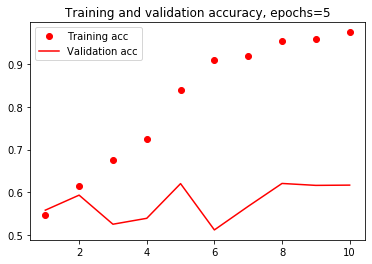

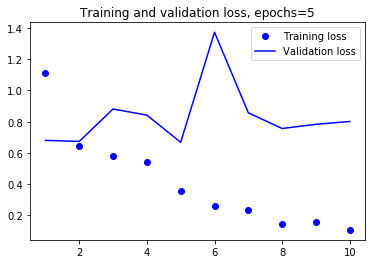

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# plot epochs and acc with red circle markers
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy, epochs=5')
plt.legend()
plt.figure()
# plot epochs and loss with blue circle markers
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss, epochs=5')
plt.legend()
plt.show()

1000/1000 [==============================] - ETA:  - ETA:  - 0s 103us/step
Accuracy: 100.000000 Loss : 0.026810856580734253


Compare between part 1 & part 2....EXPLAIN
We can see the accuracy of pretrained data model is higher than one hot encoding method as it has larger sataset for training the model. A pre-trained model is a model created by some one else to solve a similar problem. Instead of building a model from scratch to solve a similar problem, you use the model trained on other problem as a starting point.

The training accuracy is very high than validation accuracy which indicates the model suffers from overfitting.
